In [15]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('../data/data_Ea83680_k026000000000.0_V0.2.csv', index_col=0)
V = 0.2

In [5]:
x_cols = ['Cae', 'Cbe', 'T', 'Q']
y_col = ['Cc']

minmax = MinMaxScaler()
in_data = minmax.fit_transform(data[x_cols].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(in_data, data[y_col].to_numpy(), test_size=.2, )
Y_test = Y_test.reshape(Y_test.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

print(f'x train: {X_train.shape}, x test: {X_test.shape}')
print(f'y train: {Y_train.shape}, y test: {Y_test.shape}')

x train: (8000, 4), x test: (2000, 4)
y train: (8000,), y test: (2000,)


In [65]:
model = MLPRegressor(verbose=False, max_iter=500, hidden_layer_sizes=((21,1)), learning_rate='adaptive', 
                     activation='relu', validation_fraction=.1, warm_start=True, early_stopping=True,)
model.fit(X_train, Y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(21, 1),
             learning_rate='adaptive', max_iter=500, warm_start=True)

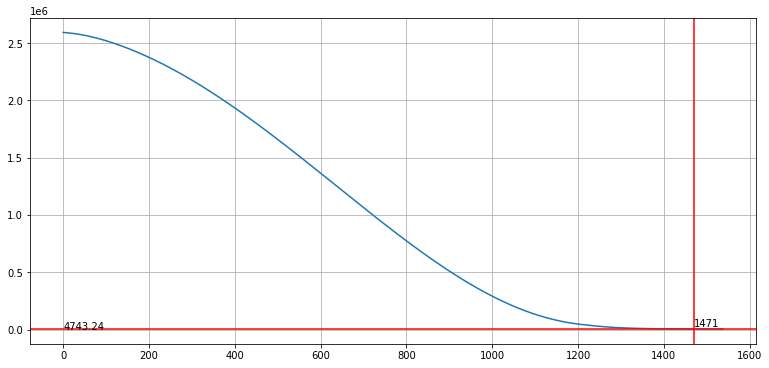

In [58]:
plot_loss(model)

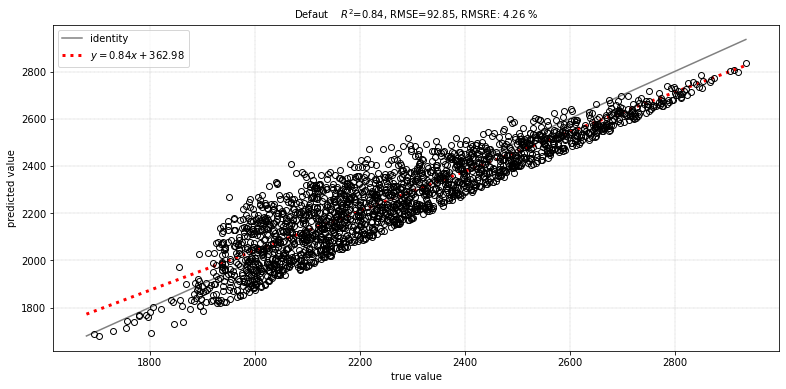

In [63]:
Y_test_hat = model.predict(X_test)
plot_identity_graphic(Y_test, Y_test_hat)

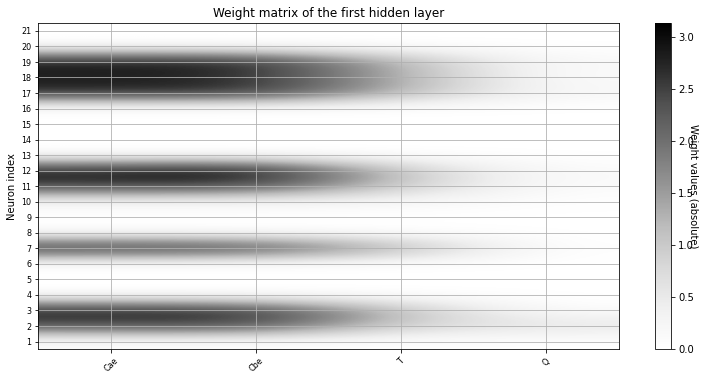

In [64]:
plot_weight(model.coefs_[0], in_data, x_cols)